In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
folder_path = 'UTKFace'

In [3]:
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))
    img_path.append(file)

In [4]:
len(age)

23708

In [5]:
df = pd.DataFrame({'age': age, 'gender': gender, 'img': img_path})

In [6]:
df.shape

(23708, 3)

In [7]:
df.head(4)

,age,gender,img
0,100,0,100_0_0_20170112213500903.jpg.chip.jpg
1,100,0,100_0_0_20170112215240346.jpg.chip.jpg
2,100,1,100_1_0_20170110183726390.jpg.chip.jpg
3,100,1,100_1_0_20170112213001988.jpg.chip.jpg


In [8]:
train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [9]:
train_df.shape

(20000, 3)

In [10]:
test_df.shape

(3708, 3)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [14]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

In [15]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

resnet.trainable=False

output = resnet.layers[-1].output

In [16]:
flatten = Flatten()(output)

In [17]:
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

In [18]:
dense3 = Dense(512, activation='relu')(dense1)
dense4 = Dense(512, activation='relu')(dense2)

In [19]:
output1 = Dense(1, activation='linear', name='age')(dense3)
output2 = Dense(1, activation='sigmoid', name='gender')(dense4)

In [20]:
model = Model(inputs=resnet.input, outputs=[output1, output2])

In [21]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'},loss_weights={'age':1,'gender':99})

In [23]:
model.fit(train_generator, batch_size=32, epochs=2, validation_data=test_generator)

Epoch 1/2
625/625 [==============================] - 210s 336ms/step - loss: 83.9706 - age_loss: 15.1083 - gender_loss: 0.6956 - age_mae: 15.1083 - gender_accuracy: 0.5200 - val_loss: 84.3381 - val_age_loss: 15.7722 - val_gender_loss: 0.6926 - val_age_mae: 15.7722 - val_gender_accuracy: 0.5173
Epoch 2/2
625/625 [==============================] - 207s 332ms/step - loss: 83.6569 - age_loss: 14.9758 - gender_loss: 0.6937 - age_mae: 14.9758 - gender_accuracy: 0.5235 - val_loss: 83.6181 - val_age_loss: 14.9753 - val_gender_loss: 0.6934 - val_age_mae: 14.9753 - val_gender_accuracy: 0.5173


more about: https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [24]:
import cv2

In [25]:
test_img = cv2.imread('alamin.jpeg')

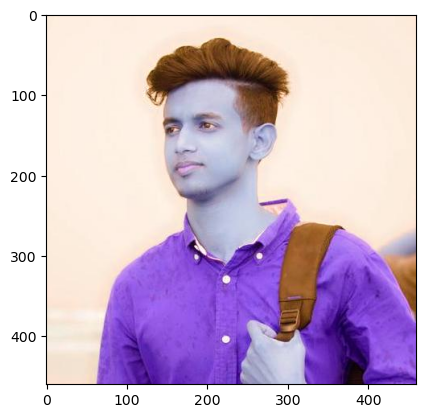

In [26]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [27]:
test_img.shape

(460, 460, 3)

In [28]:
test_img = cv2.resize(test_img,(200, 200))

In [29]:
test_input = test_img.reshape(1, 200, 200, 3)

In [30]:
model.predict(test_input)

1/1 [==============================] - 2s 2s/step


[array([[5.7872334]], dtype=float32), array([[0.61934274]], dtype=float32)]